## IMPORTING LIBRARIES

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## IMPORTING DATASET

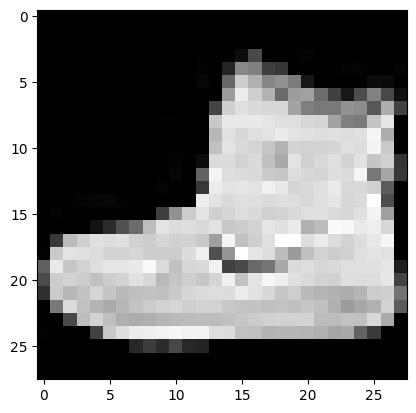

9

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

plt.imshow(X_train[0] ,cmap = "gray")
plt.show()


## NORMALISING INPUT DATA

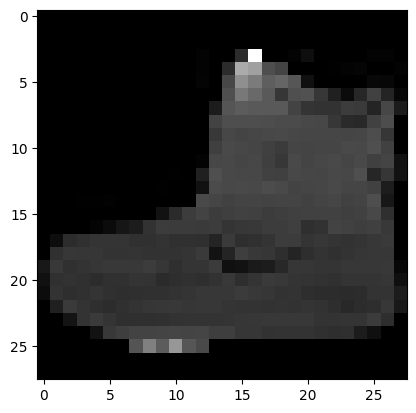

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train = tf.keras.utils.normalize(X_train , axis = 1)
X_test = tf.keras.utils.normalize(X_test , axis = 1)

plt.imshow(X_train[0] ,cmap = "gray")
plt.show()

## BUILDING MODEL


In [23]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128 , activation= tf.nn.relu),
    tf.keras.layers.Dense(128 , activation= tf.nn.relu),
    tf.keras.layers.Dense(10 , activation= tf.nn.softmax)
])

model.compile(optimizer = "adam" , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ["accuracy"])

model.fit(X_train,y_train , validation_split=0.1 , epochs = 10)

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4761 - accuracy: 0.8285 - val_loss: 0.3719 - val_accuracy: 0.8607
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3522 - accuracy: 0.8692 - val_loss: 0.3613 - val_accuracy: 0.8670
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.3178 - accuracy: 0.8818 - val_loss: 0.3311 - val_accuracy: 0.8777
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8900 - val_loss: 0.3221 - val_accuracy: 0.8818
Epoch 5/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2745 - accuracy: 0.8965 - val_loss: 0.3581 - val_accuracy: 0.8680
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.8999 - val_loss: 0.3307 - val_accuracy: 0.8825
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9059 - val_loss: 0.3086 - val_accuracy:

In [24]:
model.save("fashion_MNIST.model")

INFO:tensorflow:Assets written to: fashion_MNIST.model\assets


INFO:tensorflow:Assets written to: fashion_MNIST.model\assets


313/313 [==============================] - 1s 2ms/step

prediction =  Ankle boot


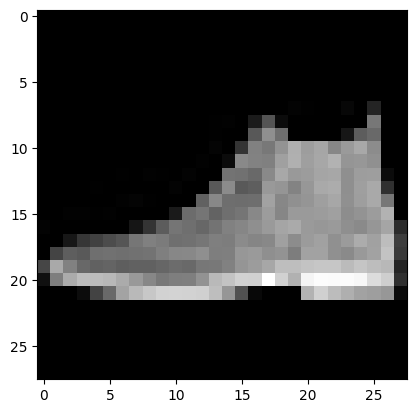

In [27]:
new_model = tf.keras.models.load_model("fashion_MNIST.model")

predictions = new_model.predict([X_test])
print("\nprediction = ",class_names[np.argmax(predictions[0])])

plt.imshow(X_test[0] , cmap = "gray")